In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\dimri\OneDrive\Desktop\vs code java\myfirstvscode\logistic regression\robosheet2.csv')

In [3]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


1. identifying missing data 


we shall identify missing data and then decide how to deal with it, we might want to remove that one entire row if there isnt much data missing from our dataset, or we can decide to impute it, i.e. make an educated guess of the value. replace it with the mean of that column 

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

we can see whats going on in these object dtype columns 

In [7]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [8]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

location and date are not really important to us to predict rain tomorrow as yes or no we might as well just drop these two 

In [10]:
df = df.drop(['Location','Date'], axis = 1,)
#we drop all these columns 
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
from sklearn.impute import SimpleImputer 

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
#imputing missing values for categorical column

In [14]:

for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

In [15]:
df['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [16]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [17]:

df.shape

(145460, 21)

In [18]:
df = df.fillna(df.mean())

In [19]:
df.shape

(145460, 21)

In [20]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,0,44.0,0,0,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,7.4,25.1,0.0,5.468232,7.611178,1,44.0,1,1,4.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12.9,25.7,0.0,5.468232,7.611178,2,46.0,0,1,19.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.468232,7.611178,3,24.0,2,2,11.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,17.5,32.3,1.0,5.468232,7.611178,0,41.0,3,3,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [21]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

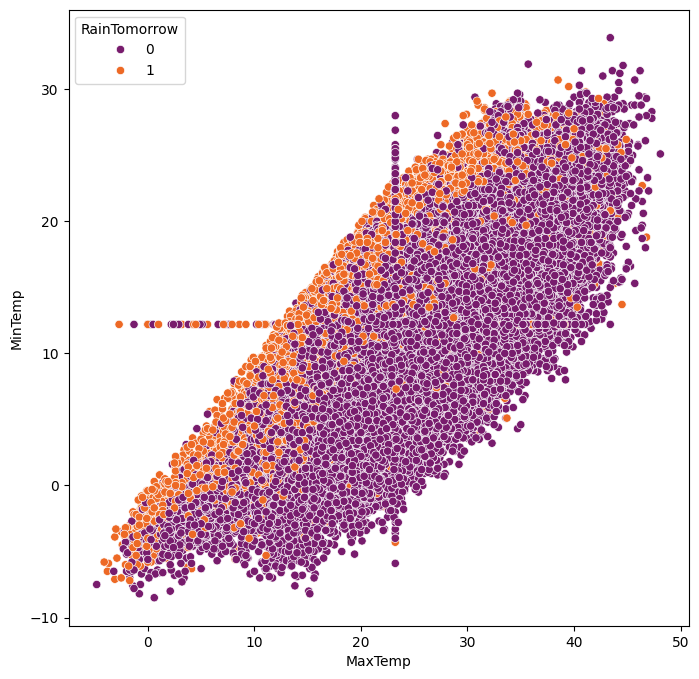

In [22]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.scatterplot(x='MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno', data = df)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(116368, 20)
(116368,)
(29092, 20)
(29092,)


In [26]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [27]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])






In [28]:
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20, 116368)
(1, 116368)
(20, 29092)
(1, 29092)


In [30]:
def Sigmoid(X):
    return 1/(1+np.exp(-X))

In [31]:
def model(X, Y, lr, iterations):
    m = X_train.shape[1] #total no. of training exmples fed to algorith 
    n = X_train.shape[0] #how many features


    #initialising
    W = np.zeros((n,1))
    B = 0 


    cost_list=[]

    for i in range (iterations): 
        Z = np.dot(W.T,X)+B
        Y_cap=Sigmoid(Z)


        #loss fn

        cost = -(1/m)*np.sum(Y*np.log(Y_cap)+(1-Y)*np.log(1-Y_cap))


        #gradient descent
        dW = (1/m)*np.dot(Y_cap-Y, X.T)
        dB = (1/m)*np.sum(Y_cap - Y)

        W = W - lr*dW.T
        B = B - lr*dB

        cost_list.append(cost)  #just to be able to see if cost fn is decreasing on every iteration or not
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
    return W,B, cost_list
        

         



In [32]:
iterations = 10000

In [33]:
lr = 0.0000015

In [34]:
W,B,cost_list = model(X_train,Y_train,lr=lr,iterations=iterations)

cost after  0 iteration is :  0.6931471805599453


cost after  1000 iteration is :  0.4978933807281503
cost after  2000 iteration is :  0.47778321285232944
cost after  3000 iteration is :  0.46249399266882596
cost after  4000 iteration is :  0.4506637967336722
cost after  5000 iteration is :  0.44135208812719984
cost after  6000 iteration is :  0.43390421231752474
cost after  7000 iteration is :  0.42785868716683256
cost after  8000 iteration is :  0.42288531141495866
cost after  9000 iteration is :  0.4187440850517596


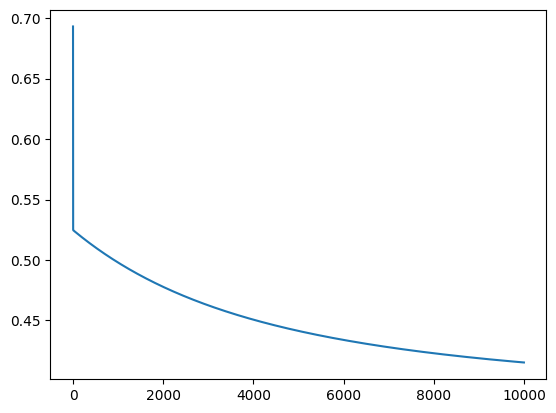

In [35]:
plt.plot(np.arange(iterations),cost_list)

In [36]:
def accuracy(X,Y,W,B):
    Z = np.dot(W.T,X)+B
    Y_cap = Sigmoid(Z)
    Y_cap=Y_cap>0.5 
    Y_cap = np.array(Y_cap,dtype = 'int64')
    acc = (1-np.sum(np.absolute(Y_cap-Y))/Y.shape[1])*100
    print('accuracy is :  ',round(acc, 2),'%')
    

In [37]:
accuracy(X_test,Y_test,W,B)

accuracy is :   81.41 %
